# Classification Problem

My main aim is to build a model which helps the user to classify the songs on the basis of genre of a song by using different attributes present in the dataset like bpm, energy, danceability, db, live, valence, duration, acousticness, speechiness, popularity and all other attributes.Using the attributes stated I am making a machine learning model which helps us in predicting the genre of the song.This will make it possible for Spotify to recommend songs to users who are creating genre-based playlists.

# 1. Packages Used 

**1.pandas**- to read csv file and working with datasets.
**2.numpy**- for manipulating data and performing mathematical operations on the dataset.
**3.matplotlib**- for plotting graphs and visualisation of the data.
**4.seaborn**- for plotting the corelation matrix in the form a heatmap.
**5.sklearn**- library for using different machine learning models to train our models.The models we have used are:
**a.Linear reggression b.Support Vector Machine c.Random Forest d.Decision Tree e.Gradient boosting
regressor.**


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report

**Load the Dataset**

In [2]:
song_train_data=pd.read_csv("CS98XClassificationTrain.csv")

# 2.Exploratory and preprocessing of the data

Here, we looked at the raw form of the data. This is useful for examining the dataset's fundamental format. After reviewing the data, we sanitise it to improve model performance and accuracy. We must first obtain the data structure of the dataset Following we will search the dataset for duplicate and null values and eliminate any rows that have these values.

In [3]:
song_train_data.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [4]:
# Looking for the data structure of the dataset
song_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [5]:
# Finding the null values in the each column of the dataset
song_train_data.isna().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

There are total of 453 rows of data in every columns of the song_train_data except the 'top genre' column which has 438 rows of data and 15 rows are missing (Null) value. So we will fill the missing values with mode of top genre column

In [6]:
song_train_data.fillna(song_train_data['top genre'].mode()[0], inplace=True)

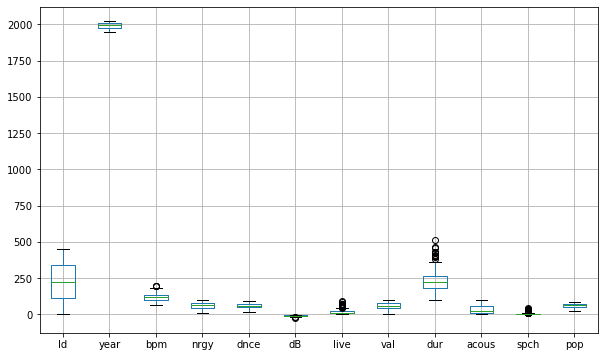

In [7]:
# checking for the outliers
plt.figure(figsize=(10,6))
song_train_data.boxplot()
plt.show()

While reviewing the above boxplot we can observe that many outlier are there in the various columns. Outlier is defined as the datapoint that are numerically distinct from the remaining data and located outside of the whisker box plot. So for better performance and accuracy we need to remove the outliers.

In [8]:
req_columns=["bpm","dB","live","dur","spch","pop"]

In [9]:
def eliminate_outliers(col):
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_bound =  Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 *IQR
    return lower_bound, upper_bound

I opted to treat the outliers using the IQR approach rather than maintaining them because I saw that it raised the accuracy of our model by 0.3.

The IQR approach finds outliers by placing restrictions on sample values that fall below or above the 25th percentile by a factor of k of the IQR. The number 1.5 is a typical value for the constant k.

In [10]:
for column in req_columns:
    lr,ur = eliminate_outliers(song_train_data[column])
    song_train_data[column] =np.where(song_train_data[column]>ur, ur, song_train_data[column])
    song_train_data[column] =np.where(song_train_data[column]<lr, lr, song_train_data[column])

Again check for the outlier in the box plot

In [11]:
#plt.figure(figsize=(20,10))
#song_train_data.boxplot()
#plt.show()

Initially, I intended to maintain the artist column because the data would be useful for classifiaction. WI have applied one hot encoding on the "artist" column that is categorical column and encoded it. Nevertheless, there was a discrepancy between the train set and test data, so I eliminated the artists from the train data that weren't present in the test data set. I have achieved a higher accuracy with this model, which is 0.695, and an F1 score of 1. Howerver, the csv file this model produced didn't do well in Kaggle. I also made an effort to preserve the "artist" by label encoding it. The Kaggle score was significantly lower with this model.

So I decided to drop the artist column along with Id and title as they don't offer useful information in terms of predicting genre.



In [12]:
song_train_data = song_train_data.drop(['Id', "title", "artist"],axis=1)

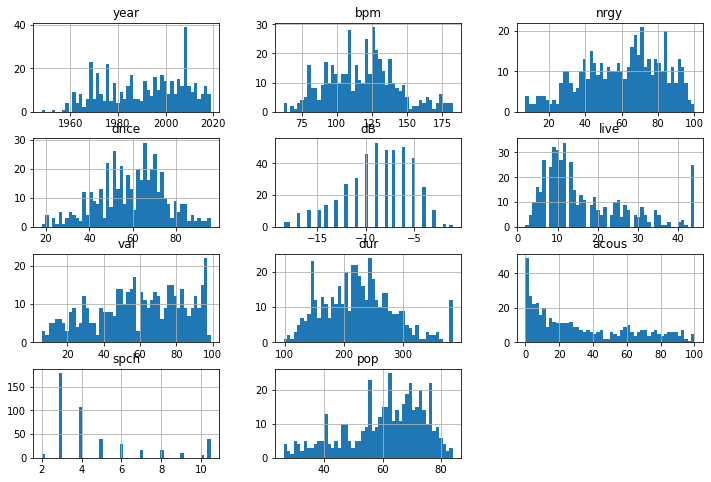

In [13]:
# Data visulaisation
song_train_data.hist(bins=50,figsize=(12,8))
plt.show()

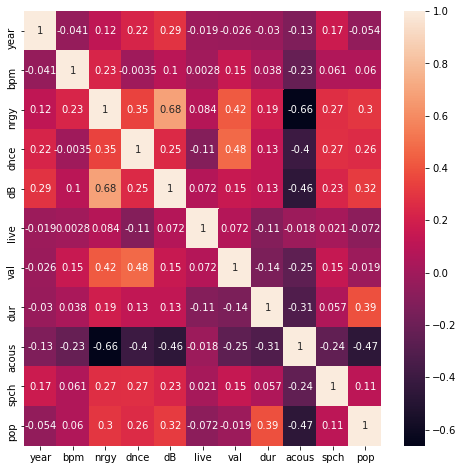

In [14]:
# Heatmap 
plt.figure(figsize=(8,8))
sns.heatmap(song_train_data.corr(),annot=True)
plt.show()

From the above heat map, we observe that there is high positive corelation between loudness(dB) and energy(nrgy) attributes also high negative corelation between energy and acoustic.So for better accuracy we will drop the acous and dB. 

In [15]:
song_train_data=song_train_data.drop(['dB', "acous"], axis=1)

In [16]:
song_train_data.value_counts("top genre")

top genre
adult standards       83
album rock            66
dance pop             61
glam rock             16
brill building pop    16
                      ..
canadian folk          1
classic danish pop     1
classic girl group     1
country                1
yodeling               1
Length: 86, dtype: int64

We observe that most songs are from adult standards, album rock, and dance rock genre. 

**Data Preparation**

Label hot encoding

In [17]:
le=LabelEncoder()
song_train_data['top genre'] = le.fit_transform(song_train_data['top genre'])

In [18]:
#song_train_data

In [19]:
# Creating the test set
x=song_train_data.drop('top genre',axis=1)
y=song_train_data['top genre']
# Spliting the data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

**Scaling the data**

In [20]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_ST = scaler.transform(x_train)
x_test_ST = scaler.transform(x_test)


**Logistic Classification**

In [21]:
log_reg=LogisticRegression()
log_reg.fit(x_train_ST, y_train)
y_predict_lr=log_reg.predict(x_test_ST)


In [22]:
# Model evaluation
print(accuracy_score(y_test,y_predict_lr))
print(precision_score(y_test,y_predict_lr, average="micro"))
print(recall_score(y_test,y_predict_lr, average="micro"))
print(f1_score(y_test,y_predict_lr, average="micro"))

0.43956043956043955
0.43956043956043955
0.43956043956043955
0.43956043956043955


Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_cls= DecisionTreeClassifier(max_depth=5)
dec_tree_cls.fit(x_train_ST,y_train)
y_pred_dtc = dec_tree_cls.predict(x_test_ST)
accuracy_score(y_test,y_pred_dtc)

0.42857142857142855

# Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [24]:
rand_forest_cls = RandomForestClassifier(random_state = 1, min_samples_split = 5, criterion='entropy',max_features='log2')
rand_forest_cls.fit(x_train_ST,y_train)
y_pred_rfc = rand_forest_cls.predict(x_test_ST)
accuracy_score(y_test,y_pred_rfc)

0.4175824175824176

**Voting classifier** : It is a machine learning estimator that trains multiple base models or estimators and predicts based on the results of each base estimator.

In [25]:
voting_clf = VotingClassifier(estimators=[('lr', log_reg),('dtc',dec_tree_cls),('rf', rand_forest_cls)],voting='hard')
voting_clf.fit(x_train_ST,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dtc', DecisionTreeClassifier(max_depth=5)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features='log2',
                                                     min_samples_split=5,
                                                     random_state=1))])

In [26]:
for clf in (log_reg, rand_forest_cls,dec_tree_cls,voting_clf):
    clf.fit(x_train_ST, y_train)
    ypred = clf.predict(x_test_ST)
    print(clf.__class__.__name__, accuracy_score(y_test, ypred))

LogisticRegression 0.43956043956043955
RandomForestClassifier 0.4175824175824176
DecisionTreeClassifier 0.42857142857142855
VotingClassifier 0.43956043956043955


Loading the Test Dataset

In [27]:
song_test_data=pd.read_csv("CS98XClassificationTest.csv")
c_matrix = confusion_matrix(y_test,y_predict_lr)
print(c_matrix)

[[17  0  3 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]]


We have to remove outlier from the test dataset and will do the same thing as we did in the train dataset.

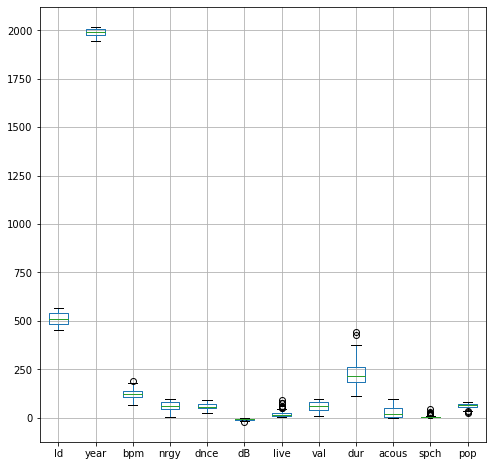

In [28]:
plt.figure(figsize=(8,8))
song_test_data.boxplot()
plt.show()

In [29]:
for column in req_columns:
    lr,ur = eliminate_outliers(song_test_data[column])
    song_test_data[column] =np.where(song_test_data[column]>ur, ur, song_test_data[column])
    song_test_data[column] =np.where(song_test_data[column]<lr, lr, song_test_data[column])

In [30]:

Id = song_test_data.iloc[:,0].values
song_test_data = song_test_data.drop(['Id',"title","artist",'dB', "acous"], axis=1)

Scaling the test dataset

In [31]:
x_test_1 = scaler.transform(song_test_data)

In [32]:
song_test_data.predict=clf.predict(x_test_1)


<ipython-input-32-d496aaaa04ab>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  song_test_data.predict=clf.predict(x_test_1)


In [33]:
Result_cls = pd.DataFrame()
Result_cls['Id']= Id
Result_cls['top genre'] = pd.DataFrame(le.inverse_transform(song_test_data.predict))
Result_cls.to_csv('Result_cls.csv', index= False)

# Conclusion
I have developed 5 models that have given different results on same dataset. Using data exploration and preprocessing and then feature engineering we have observed the correlation of various attributes to the top genre attribute.The best method was the voting classifier with an accuracy score of 0.43956043956043955.The final kaggle score is 0.37500.

# References

[1] Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron 
[2] Logistic Regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
[3] Decision Tree : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
[4] Random Forest : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#:~:text=A%20random%20forest%20classifier.,accuracy%20and%20control%20over%2Dfitting
[5] Voting Classifier : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html